In [16]:
# Your code here
from keras.preprocessing.image import ImageDataGenerator
train_dir = 'data/genres_mel_spec/CNN_folders/train'
validation_dir = 'data/genres_mel_spec/CNN_folders/val/'
test_dir = 'data/genres_mel_spec/CNN_folders/test/'


In [17]:

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                        target_size=(150, 150), 
                                                        batch_size=20, 
                                                        class_mode='categorical')

Found 6400 images belonging to 8 classes.
Found 797 images belonging to 8 classes.


In [18]:
from keras import layers
from keras import models
from keras import optimizers
import datetime


In [19]:

from keras import models,layers

In [27]:
# from keras.preprocessing.image import ImageDataGenerator, array_to_img

# Initialize Base
from keras.applications import VGG19
cnn_base = VGG19(weights='imagenet',
                 include_top=False,
                 input_shape=(240, 240, 3))

# Define Model Architecture
model = models.Sequential()
model.add(cnn_base)
model.add(layers.Flatten())

model.add(layers.Dense(8, activation='softmax'))

cnn_base.trainable = False

# You can check whether a layer is trainable (or alter its setting) through the layer.trainable attribute
for layer in model.layers:
    print(layer.name, layer.trainable)
    
# Similarly, we can check how many trainable weights are in the model 
print(len(model.trainable_weights))

model.summary()

vgg19 False
flatten_4 True
dense_16 True
2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_4 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 200712    
Total params: 20,225,096
Trainable params: 200,712
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
start = datetime.datetime.now()

#Define Initial Parameters (same as previous code block)
datagen = ImageDataGenerator(rescale=1./255) 
batch_size = 10

# Get all the data in the directory split/train (542 images), and reshape them
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(240, 240), 
                                                    batch_size= 20,
                                                    class_mode='categorical') 

# Get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(validation_dir, 
                                                                       target_size=(240, 240), 
                                                                       batch_size=20,
                                                                       class_mode='categorical')

# Get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir, 
                                                                        target_size=(240, 240), 
                                                                        batch_size=180,
                                                                        class_mode='categorical',
                                                                        shuffle=False)

        
test_images, test_labels = next(test_generator)


# Compilation
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

# Fitting the Model
history = model.fit_generator(train_generator,steps_per_epoch=10,
                
                              epochs=10,
                              validation_data=val_generator)


end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))

Found 6400 images belonging to 8 classes.
Found 797 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
Epoch 1/10
 8/10 [=======================>......] - ETA: 8s - loss: 2.1917 - acc: 0.1688 

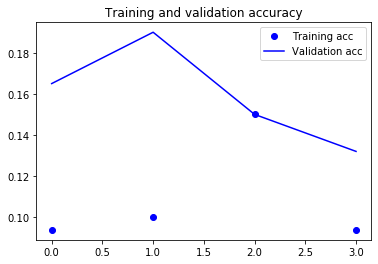

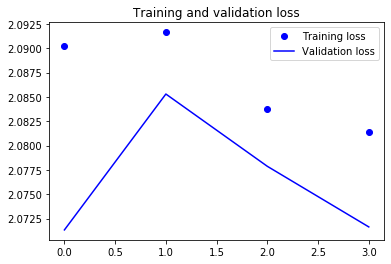

In [11]:
# Your code here; visualize the training / validation history associated with fitting the model

import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()